In [1]:
# in your notebook or another script
from Data_Cleaning import get_core_filtered
from Data_Enrichment import get_features

RAW_DIR = "data/raw"

# a) only filtered core DataFrames (Big-5) in memory
core = get_core_filtered(RAW_DIR)
df_teams_season       = core["df_teams_season"]
df_teams_details      = core["df_teams_details"]
df_players_profile    = core["df_players_profile"]
df_player_performance = core["df_player_performance"]

# b) features + Ballon d'Or flag in one line
df_feats, feature_cols = get_features(RAW_DIR)
# Filter out rows where season_end_year != 2025
df_feats = df_feats[(df_feats['season_end_year'] != 2025) & (df_feats['season_end_year'] != 2026)]

# Drop the column 'ballon_dor_winner'
df_feats = df_feats.drop(columns=['ballon_dor_winner'])

/workspaces/Machine-learning/Data_Enrichment.py:232: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ballon_dor_winner"] = df["ballon_dor_winner"].fillna(False).astype(bool)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_feats.isnull().sum()

player_id             0
season_name           0
goals                 0
assists               0
penalty_goals         0
                     ..
a_per90_w             0
gc_per90_w            0
clean_sheet_rate_w    0
discipline_rate_w     0
pen_share_w           0
Length: 76, dtype: int64

In [4]:
# Take them away
df_feats.dropna(inplace=True)

In [5]:
a = df_feats.select_dtypes(include=np.number)
a.head()

,goals,assists,penalty_goals,own_goals,yellow_cards,second_yellow_cards,direct_red_cards,minutes_played,goals_conceded,clean_sheets,...,minutes_played_z_delta,matches_played_z_lag1,matches_played_z_delta,ga_per90_w,g_per90_w,a_per90_w,gc_per90_w,clean_sheet_rate_w,discipline_rate_w,pen_share_w
0,0.0,0,0,0,0,0,0,0.0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0,0,0,0,0,0,0.0,0,0,...,-0.017751,-1.225316,0.000527,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
7,0.0,0,0,0,0,0,0,0.0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
8,0.0,1,0,0,3,0,0,0.0,0,0,...,0.000000,0.000000,0.000000,-0.152846,-0.096039,-0.056806,0.0,0.0,0.214248,0.0
9,0.0,1,0,0,1,1,0,0.0,0,0,...,-0.012108,-0.625336,-0.105660,-0.152846,-0.096039,-0.056806,0.0,0.0,0.214248,0.0


In [6]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler() #Z score
X1 = scaler.fit_transform(a)

In [8]:
print(X1)

[[-4.49638675e-01 -5.33511294e-01 -1.95531957e-01 ...  2.14789777e-03
   9.57374061e-04  6.77718838e-03]
 [-4.49638675e-01 -5.33511294e-01 -1.95531957e-01 ...  2.14789777e-03
   9.57374061e-04  6.77718838e-03]
 [-4.49638675e-01 -5.33511294e-01 -1.95531957e-01 ...  2.14789777e-03
   9.57374061e-04  6.77718838e-03]
 ...
 [-4.49638675e-01 -5.33511294e-01 -1.95531957e-01 ...  2.14789777e-03
  -1.25156540e+00  6.77718838e-03]
 [-4.49638675e-01 -1.09804519e-01 -1.95531957e-01 ...  2.14789777e-03
   2.50600292e+00  6.77718838e-03]
 [-4.49638675e-01 -5.33511294e-01 -1.95531957e-01 ...  2.14789777e-03
   9.57374061e-04  6.77718838e-03]]


In [9]:
from sklearn.cluster import KMeans
# We apply it to our date
kmeans = KMeans(n_clusters=3, random_state=1,n_init=50).fit(X1)

# Here it is the clustering result
labels = kmeans.labels_
print(labels)
a.dtypes


[1 1 1 ... 1 1 1]


goals                 float64
assists                 int64
penalty_goals           int64
own_goals               int64
yellow_cards            int64
                       ...   
a_per90_w             float64
gc_per90_w            float64
clean_sheet_rate_w    float64
discipline_rate_w     float64
pen_share_w           float64
Length: 66, dtype: object

In [13]:
# We create a new variable in the original dataset
df_feats['kmeans_cluster'] = labels.astype(str)

# And we see the states in the clusters
df_feats[df_feats['kmeans_cluster'] == '0']['competition_name'].tolist()

['Serie A',
 'Premier League',
 'UEFA Champions League',
 'Bundesliga',
 'Bundesliga',
 'UEFA Champions League',
 'Ligue 1',
 'Ligue 1',
 'Ligue 1',
 'Ligue 1',
 'Ligue 1',
 'Ligue 1',
 'Premier League',
 'Premier League',
 'Premier League',
 'Serie A',
 'Serie A',
 'Serie A',
 'Serie A',
 'Serie A',
 'UEFA Champions League',
 'Serie A',
 'Serie A',
 'Bundesliga',
 'Bundesliga',
 'Bundesliga',
 'Bundesliga',
 'UEFA Champions League',
 'Ligue 1',
 'Premier League',
 'Premier League',
 'Premier League',
 'Bundesliga',
 'Bundesliga',
 'Bundesliga',
 'UEFA Champions League',
 'Bundesliga',
 'Serie A',
 'Serie A',
 'Bundesliga',
 'Bundesliga',
 'Bundesliga',
 'Ligue 1',
 'Ligue 1',
 'Bundesliga',
 'Bundesliga',
 'Ligue 1',
 'UEFA Champions League',
 'UEFA Champions League',
 'Serie A',
 'Serie A',
 'Serie A',
 'Serie A',
 'Champions League',
 'Champions League',
 'Bundesliga',
 'UEFA Champions League',
 'Bundesliga',
 'Bundesliga',
 'Premier League',
 'Ligue 1',
 'Ligue 1',
 'LaLiga',
 'LaL

In [16]:
df_feats[df_feats['kmeans_cluster'] == '1']['competition_name'].tolist()

['LaLiga',
 'LaLiga',
 'UEFA Champions League',
 'UEFA Champions League',
 'UEFA Champions League',
 'UEFA Champions League',
 'Serie A',
 'LaLiga',
 'Ligue 1',
 'Ligue 1',
 'Serie A',
 'Serie A',
 'Ligue 1',
 'Ligue 1',
 'Ligue 1',
 'Ligue 1',
 'Premier League',
 'UEFA Champions League',
 'Ligue 1',
 'Bundesliga',
 'LaLiga',
 'LaLiga',
 'LaLiga',
 'Ligue 1',
 'Ligue 1',
 'Serie A',
 'LaLiga',
 'Champions League',
 'Bundesliga',
 'Ligue 1',
 'Premier League',
 'Premier League',
 'LaLiga',
 'LaLiga',
 'LaLiga',
 'Premier League',
 'Premier League',
 'Premier League',
 'Premier League',
 'Premier League',
 'LaLiga',
 'LaLiga',
 'Premier League',
 'Ligue 1',
 'Premier League',
 'UEFA Champions League',
 'Serie A',
 'Serie A',
 'Premier League',
 'Serie A',
 'Serie A',
 'Serie A',
 'UEFA Champions League',
 'LaLiga',
 'LaLiga',
 'Serie A',
 'Serie A',
 'Serie A',
 'Serie A',
 'Premier League',
 'Premier League',
 'Premier League',
 'Premier League',
 'Ligue 1',
 'LaLiga',
 'Champions Leagu

In [15]:
df_feats[df_feats['kmeans_cluster'] == '2']['competition_name'].tolist()

['LaLiga',
 'LaLiga',
 'LaLiga',
 'LaLiga',
 'LaLiga',
 'LaLiga',
 'Ligue 1',
 'Premier League',
 'LaLiga',
 'Champions League',
 'Champions League',
 'Champions League',
 'Champions League',
 'Champions League',
 'Champions League',
 'Premier League',
 'LaLiga',
 'LaLiga',
 'Ligue 1',
 'Serie A',
 'Serie A',
 'Serie A',
 'Premier League',
 'Premier League',
 'Premier League',
 'Serie A',
 'Serie A',
 'Ligue 1',
 'Ligue 1',
 'Premier League',
 'Premier League',
 'Premier League',
 'Premier League',
 'Serie A',
 'Serie A',
 'UEFA Champions League',
 'UEFA Champions League',
 'Premier League',
 'UEFA Champions League',
 'UEFA Champions League',
 'UEFA Champions League',
 'LaLiga',
 'LaLiga',
 'LaLiga',
 'Bundesliga',
 'UEFA Champions League',
 'UEFA Champions League',
 'UEFA Champions League',
 'UEFA Champions League',
 'LaLiga',
 'LaLiga',
 'LaLiga',
 'LaLiga',
 'UEFA Champions League',
 'UEFA Champions League',
 'UEFA Champions League',
 'UEFA Champions League',
 'UEFA Champions League

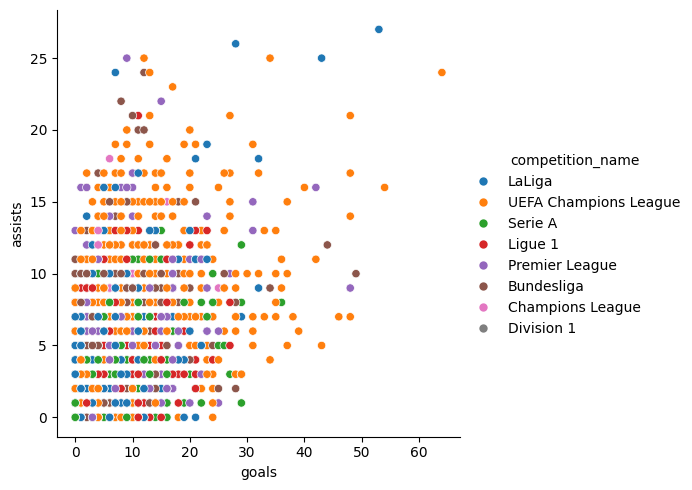

In [18]:
sns.relplot(data=df_feats, x="goals", y="assists", hue="competition_name");
plt.show()

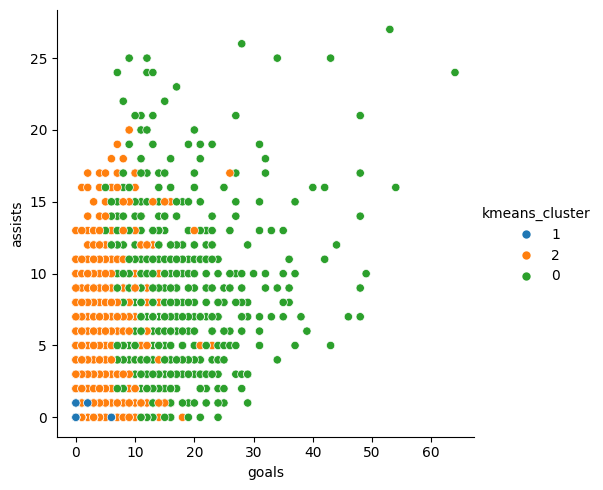

In [19]:
sns.relplot(data=df_feats, x="goals", y="assists", hue="kmeans_cluster");
plt.show()